# **PRESENTATION DE L'ETAT D'AVANCEMENT DES TRAVAUX**

## **Thème :** Apprentissage par ensemble pour la prédiction de la résistance à la compression des bétons de hautes performances (BHPs)                          


## **Auteur** : ANANJOU TSAFACK Ornéla Stéla

## **Encadreurs**: Dr. TIOGNING Lauraine et Dr. MELATAGIA Paulin

## **I) Thématique**


*   **Thème** : Prédiction de la résistance mécanique des bétons de hautes performances (BHPs).

*   **Question Scientifique** : Quel modèle d'apprentissage par ensemble permet de prédire au mieux la résistance à la compression des BHPs?

*   **Objectif Scientifique** : Construire un modèle d'apprentissage par ensemble qui prédise efficacement la résistance à la compression des BHPs


*   **Type de problème** : Un problème de régression







##  **II) Données**

### **1) Informations sur les Données** :
Le jeu de donné provient de https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength sous
le nom de **Concrete Compressive Strength DataSet** .
Il compte **1030 observations** , **9 variables**( *ciment, scories de haut fourneaux, cendres volantes, l’eau, le super-plastifiant, les agrégats de coarse, les particules fines, l’âge* ) et une variable cible correspondant à la ***résistance mécanique***.


### **2) Présentation des données**

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [3]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")

In [4]:
# affichage des donnees
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


### **3) Visualisation des données**

In [5]:
# Renommage des noms des variables caracteristiques
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


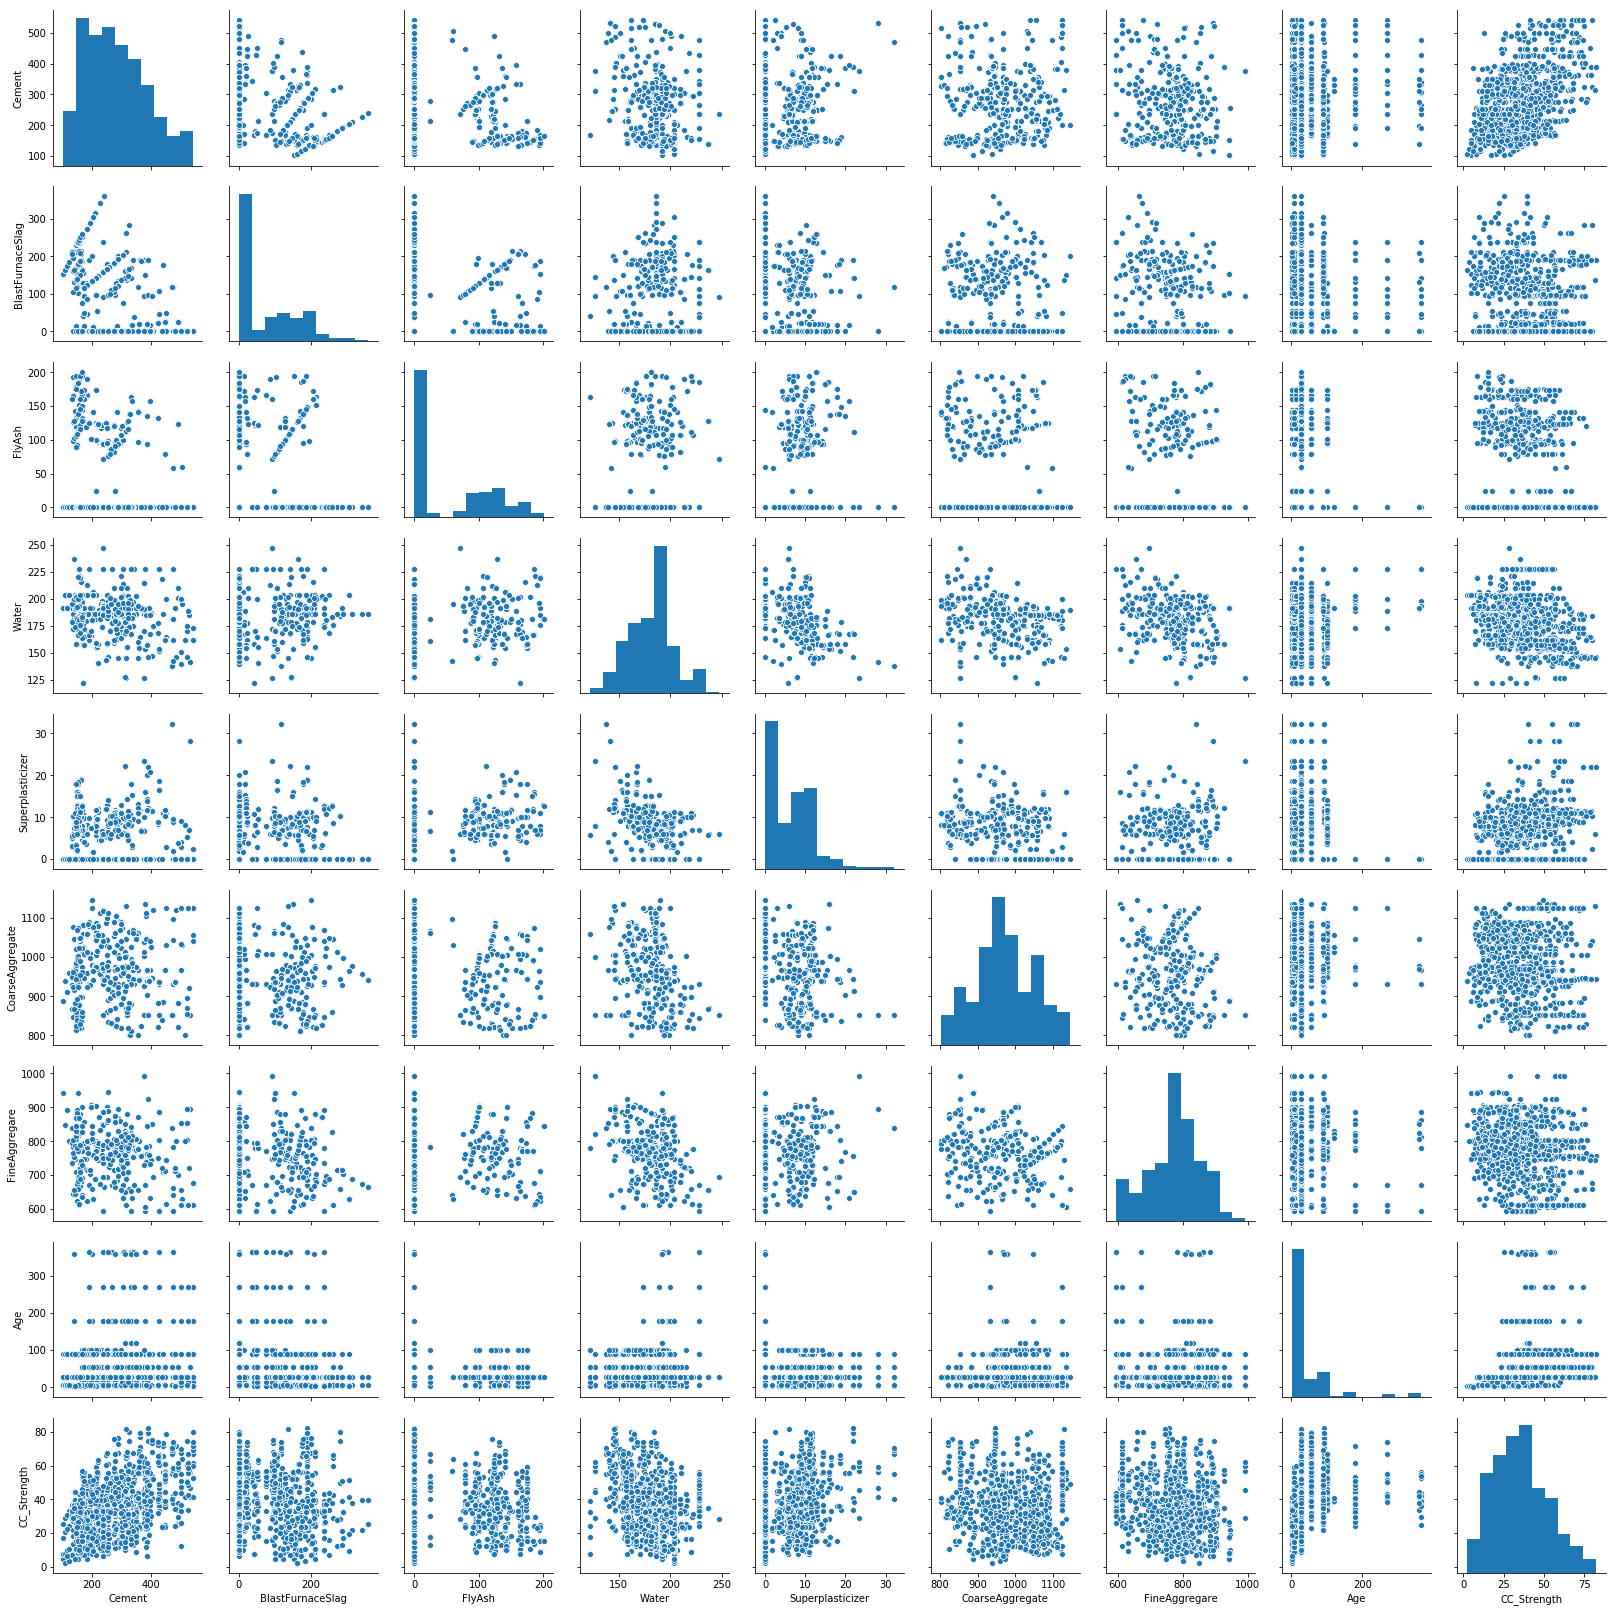

In [6]:
#Affichage d'un scatterplot pour chaque pair de variables
sns.pairplot(data)
plt.show()
#for interpretation
#• When high values of v1 go with high values of v2, v1 and v2 are positively
#associated.
#• When high values of v1 go with low values of v2, v1 and v2 are negatively
#associated.

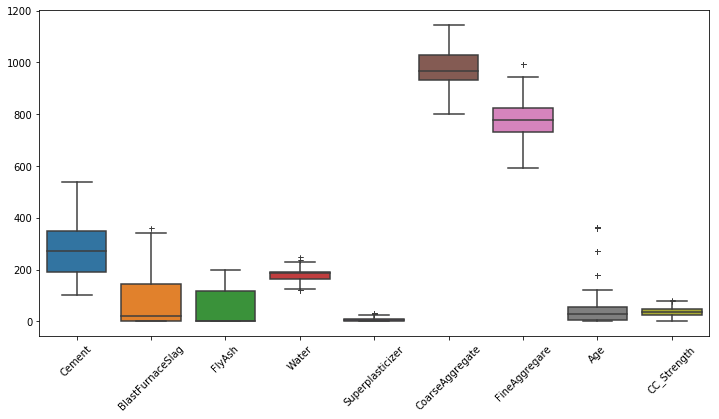

In [27]:
# Vérification des valeurs aberrantes
#Boxplots (see “Percentiles and Boxplots” on page 20) are a simple way to visually
#compare the distributions of a numeric variable grouped according to a categorical variable
plt.subplots(figsize=(12, 6))#aggrandir la figure
ax = sns.boxplot(data=data,flierprops={"marker": "+"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);# faire roter les labels

#Alaska stands out as having the fewest delays, while American has the most delays:
# the lower quartile for American is higher than the upper quartile for Alaska.

/home/ana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'Cement'),
 Text(0,0,'BlastFurnaceSlag'),
 Text(0,0,'FlyAsh'),
 Text(0,0,'Water'),
 Text(0,0,'Superplasticizer'),
 Text(0,0,'CoarseAggregate'),
 Text(0,0,'FineAggregare'),
 Text(0,0,'Age'),
 Text(0,0,'CC_Strength')]

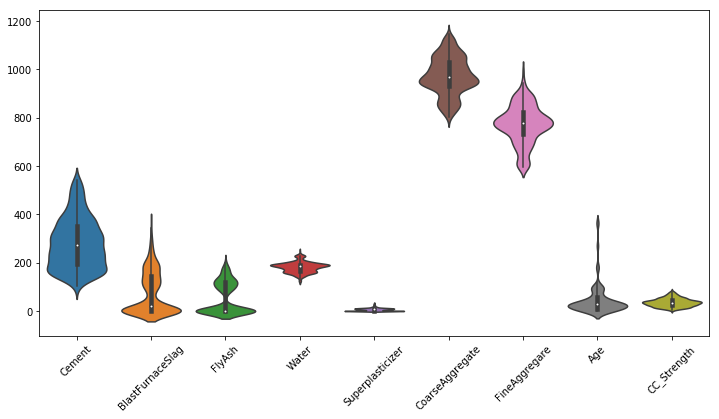

In [31]:
# violinplot is an enhancement to the boxplot
# and plots the density estimate with the density on the y-axis. The density is mirrored
# and flipped over, and the resulting shape is filled in, creating an image resembling a
# violin. The advantage of a violin plot is that it can show nuances in the distribution
# that aren’t perceptible in a boxplot.
plt.subplots(figsize=(12, 6))
vp=sns.violinplot(data=data,scale='count')
vp.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [25]:
?sns.regplot()

Signature: sns.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
Docstring:
Plot data and a linear regression model fit.

There are a number of mutually exclusive options for estimating the
regression model. See the :ref:`tutorial <regression_tutorial>` for more
information.    

Parameters
----------
x, y: string, series, or vector array
    Input variables. If strings, these should correspond with column names
    in ``data``. When pandas objects are used, axes will be labeled with
    the series name.
data : DataFrame
    Tidy ("long-form") dataframe where each column is a variable and each
    row is an observation.    
x_estimator : callable that maps vector -> scalar, option

Variable  Cement


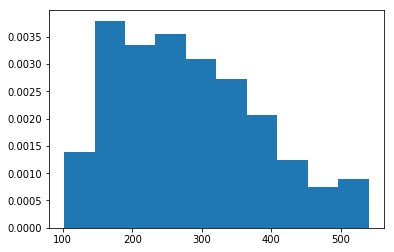

Variable  BlastFurnaceSlag


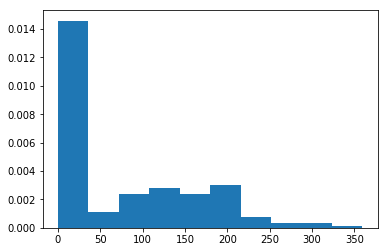

Variable  FlyAsh


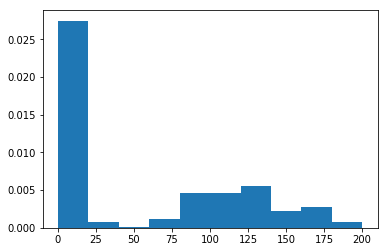

Variable  Water


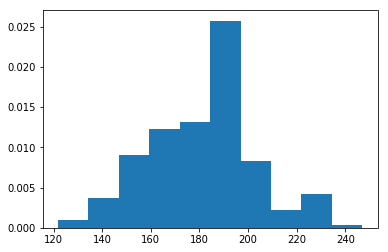

Variable  Superplasticizer


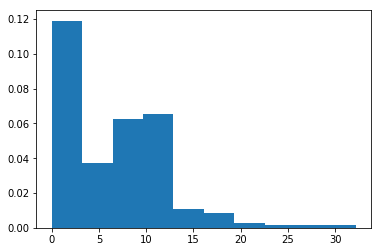

Variable  CoarseAggregate


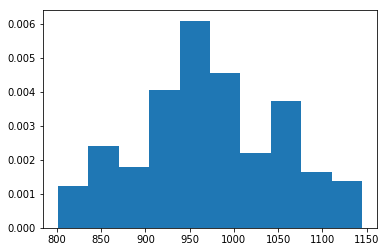

Variable  FineAggregare


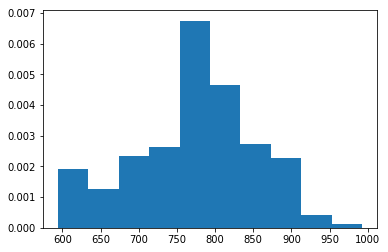

Variable  Age


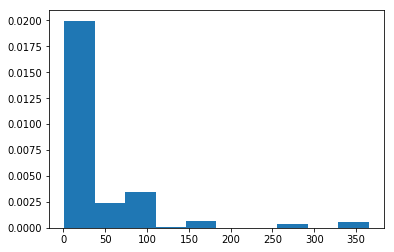

Variable  CC_Strength


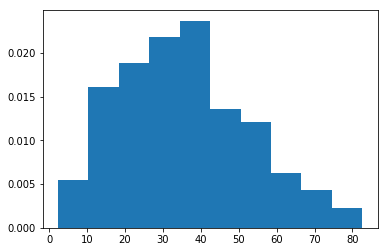

In [7]:
#histogramme de chaque variable
for name in data.columns:
  print('Variable ', name)
  plt.hist(data[name],density=True)
  plt.show()

/home/ana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: num must be 1 <= num <= 8, not 9

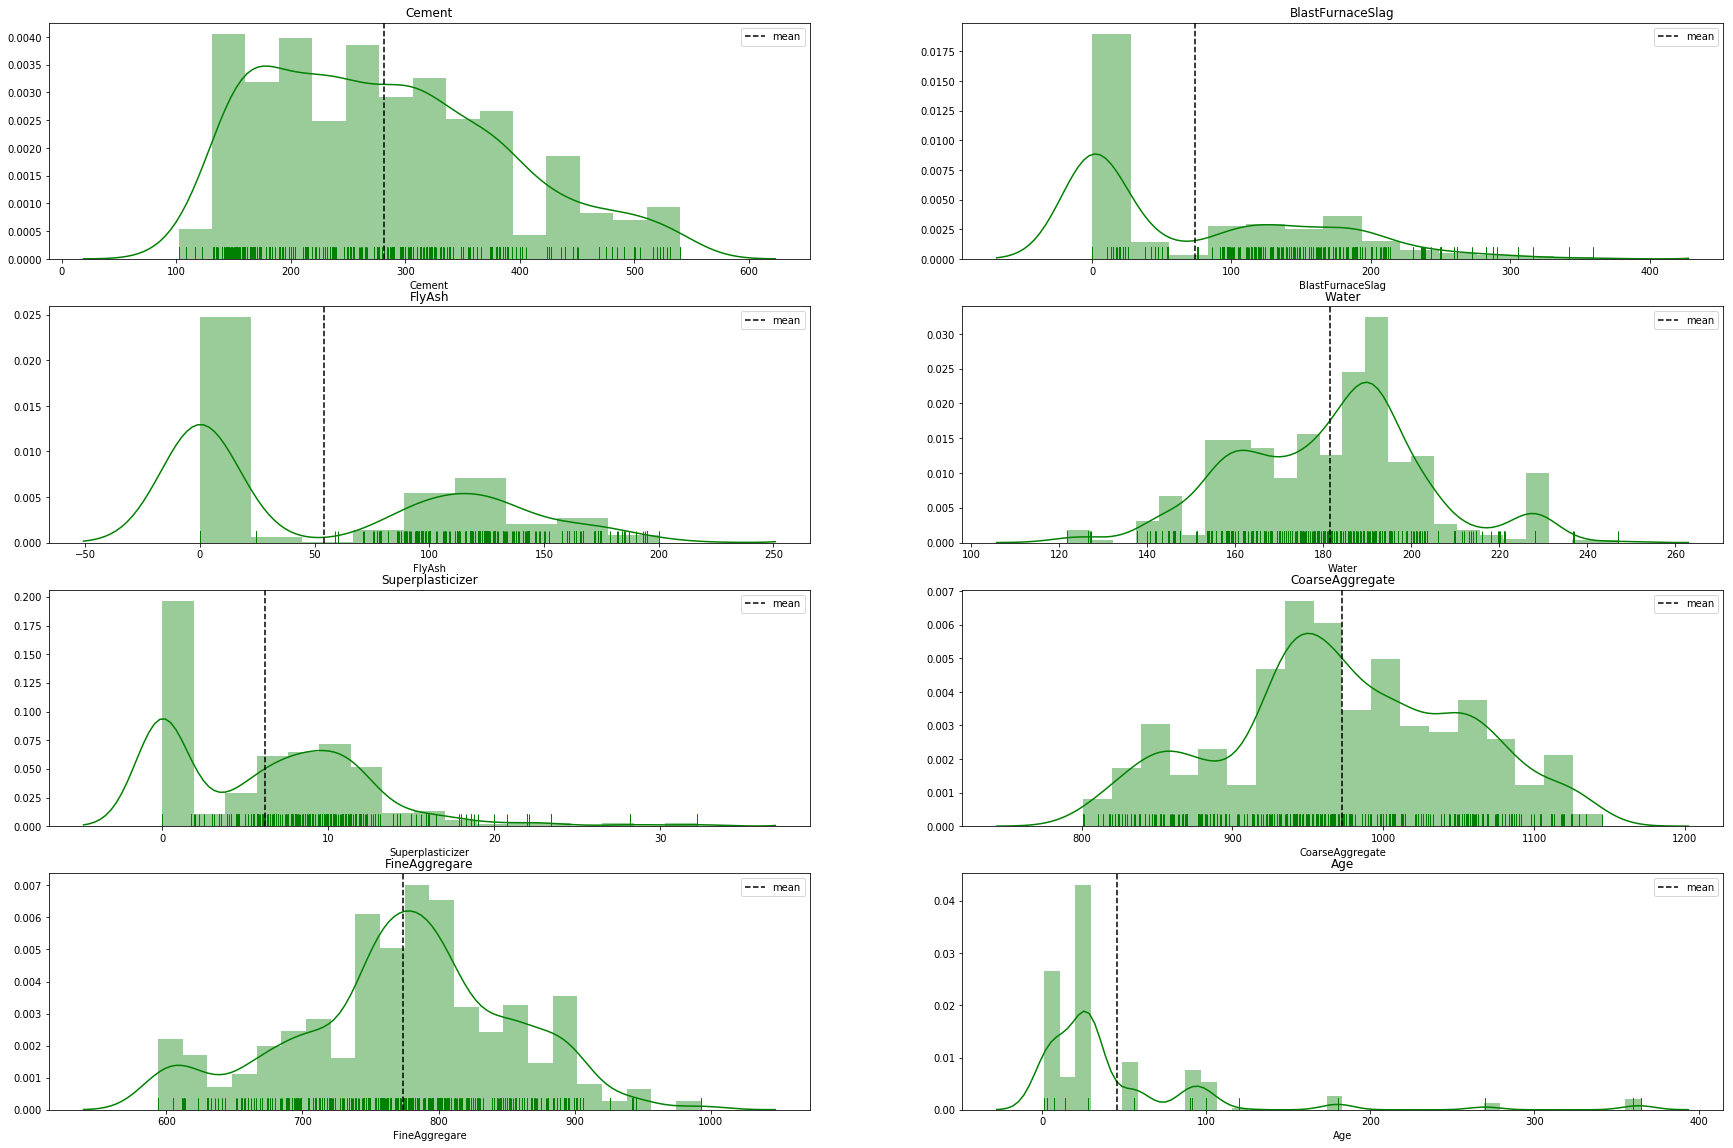

In [60]:
# Affichage du graphe de densite
#A key distinction from the histogram plotted in Figure 1-3 is the scale of the y-axis: a
#density plot corresponds to plotting the histogram as a proportion rather than counts
import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(30, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
#     plt.xlabel(i)

In [61]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [62]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### **Realisation de l'organigramme de l'article de base** 

#### 1)La normalisation du dataset

In [63]:
# Normalisation z-score ou standardisation
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

normData=scaler.fit_transform(data)

In [64]:
normData

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64519215],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.5612771 ],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26660766],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.7259282 ],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18264932],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20461667]])

In [65]:
normData=pd.DataFrame(normData)
normData

,0,1,2,3,4,5,6,7,8
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
5,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,0.702224,0.671476
6,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.471953
7,0.946178,0.244726,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,0.037726
8,-0.145186,0.465049,-0.847132,2.175367,-1.038944,-0.526514,-1.292531,-0.279733,0.601073
9,1.855649,-0.856886,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,-0.279733,0.207932


In [66]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(normData.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

normData = normData.rename(columns=mapper)

normData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753


Variable  Cement


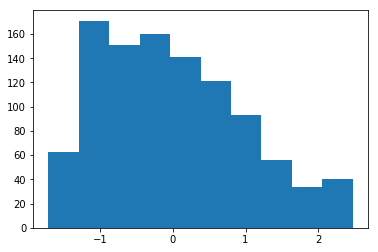

Variable  BlastFurnaceSlag


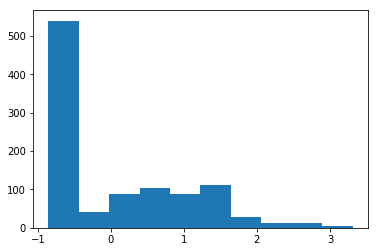

Variable  FlyAsh


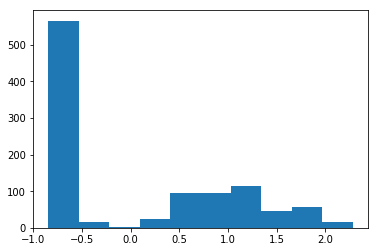

Variable  Water


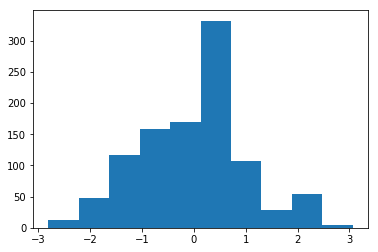

Variable  Superplasticizer


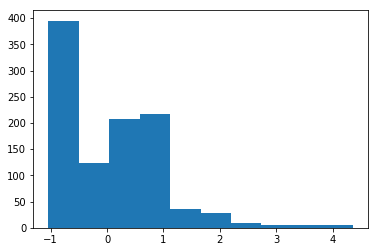

Variable  CoarseAggregate


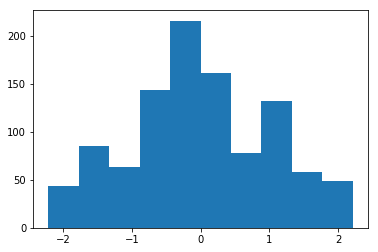

Variable  FineAggregare


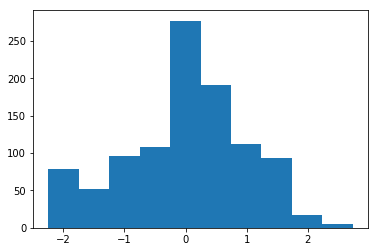

Variable  Age


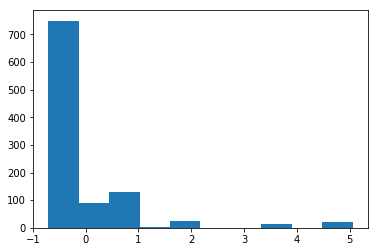

Variable  CC_Strength


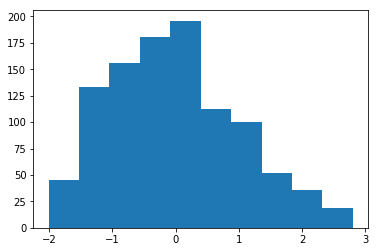

In [67]:
for name in normData.columns:
  print('Variable ', name)
  plt.hist(normData[name])
  plt.show()

In [68]:
normData.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,4.335798e-17,-1.117607e-15,1.267056e-15,5.503688e-16,3.987102e-16,-9.011131e-17,-4.575358e-16,1.534910e-16,4.486163e-16
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-8.568863e-01,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01,-2.005443e+00
25%,-8.500258e-01,-8.568863e-01,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01,-7.252985e-01
50%,-7.912996e-02,-6.017760e-01,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01,-8.235105e-02
75%,6.589771e-01,8.007508e-01,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01,6.179613e-01
max,2.477918e+00,3.310688e+00,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00,2.801689e+00


In [ ]:
df.describe()

#### 2) Fractionnment des donnees en jeu d'entrainement et de test

In [69]:
# Ici on fractionne notre dataset et 90 et 10 comme l'article de base (leur dataset etait de 1228 exemples)
from sklearn.model_selection import train_test_split

X = normData.iloc[:,:-1]
y = normData.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### 3) Entrainement des differents modeles

##### **a) Random Forest**

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 0.31 		 0.10 		0.22 		0.90


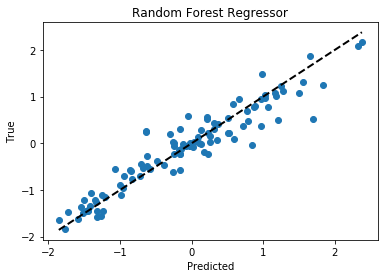

In [70]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from metrics.mean_poisson_deviance import mean_poisson_deviance
# from metrics.mean_gamma_deviance import mean_gamma_deviance 
# from metrics.max_error import max_error
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

##### **b) Extremely Randomised trees(Extra Trees)**

In [71]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=100, random_state=0)
etr.fit(X_train, y_train)
y_pred_etr=etr.predict(X_test)
etr_r2=etr.score(X_test,y_test)

print("Model \t\t\t\t R2")
print("Extra Trees Regressor \t\t{:.2f}".format(etr_r2))


Model 				 R2
Extra Trees Regressor 		0.91


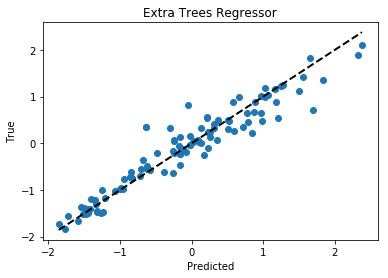

In [72]:
plt.scatter(y_test, y_pred_etr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Extra Trees Regressor")
plt.show()

##### **c) Adaptative Boosting(Adaboost)**

In [80]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(n_estimators=100, random_state=0)
abr.fit(X_train, y_train)
y_pred_abr=abr.predict(X_test)
abr_r2=abr.score(X_test,y_test)

print("Model \t\t\t\t R2")
print("AdaBoost Regressor \t\t{:.2f}".format(abr_r2))


Model 				 R2
AdaBoost Regressor 		0.78


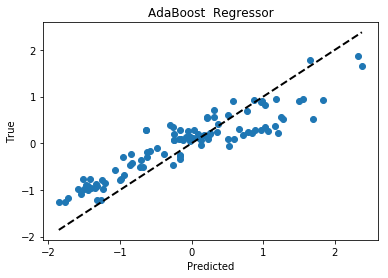

In [81]:
plt.scatter(y_test, y_pred_abr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoost  Regressor")
plt.show()

##### **d) Gradient Boosting Machine(GBM)**

In [85]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbr.fit(X_train, y_train)
y_pred_gbr=gbr.predict(X_test)
gbr_r2=gbr.score(X_test,y_test)

print("Model \t\t\t\t\t R2")
print("Gradient Boosting Regressor \t\t{:.2f}".format(gbr_r2))

Model 					 R2
Gradient Boosting Regressor 		0.89


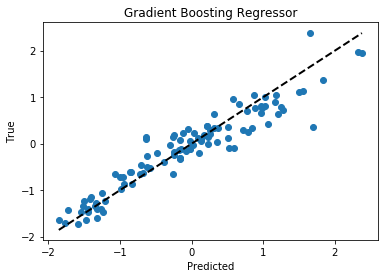

In [86]:
plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting Regressor")
plt.show()

##### **e) Extreme Gradient Boosting(XGBoost)**

In [4]:
# from sklearn.ensemble import XGBRegressor

# xgbr = XGBRegressor(n_estimators=100, random_state=0)
# xgbr.fit(X_train, y_train)
# y_pred_xgbr=xgbr.predict(X_test)
# xgbr_r2=xgbr.score(X_test,y_test)

# print("Model \t\t\t\t\t R2")
# print(" Extreme Gradient Boosting Regressor \t\t{:.2f}".format(xgbr_r2))
# import lightgbm as lgb
import scipy as scp

In [7]:
pip install xgboost
import xgboost as xgb

SyntaxError: invalid syntax (<ipython-input-7-7af5959ddcec>, line 1)

##### **f) Light Gradient Boosting Machine(LightGBM)**

In [52]:
pip install lightGBM
from lightGBM.Regressor import LGBMRegressor

lgbmr = XGBRegressor(n_estimators=100, random_state=0)
lgbmr.fit(X_train, y_train)
y_pred_lgbmr=lgbmr.predict(X_test)
lgbmr_r2=lgbmr.score(X_test,y_test)

print("Model \t\t\t\t\t R2")
print("Light Gradient Boosting Regressor \t\t{:.2f}".format(lgbmr_r2))

SyntaxError: invalid syntax (<ipython-input-52-a23430afdb92>, line 1)

##### **g) Categorical Boosting(CatBoost)**